In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df=pd.read_excel("/content/Stock market data.xlsx")
df.head()

,timestamp,symbol,open_price,high_price,low_price,close_price,volume
0,2025-01-01 03:45:00,NSE:ABB-EQ,6912.00,6929.45,6863.15,6888.00,6708
1,2025-01-01 04:00:00,NSE:ABB-EQ,6888.00,6893.05,6860.10,6866.60,3387
2,2025-01-01 04:15:00,NSE:ABB-EQ,6866.60,6880.00,6846.25,6873.30,3667
3,2025-01-01 04:30:00,NSE:ABB-EQ,6875.80,6898.75,6867.10,6879.85,3122
4,2025-01-01 04:45:00,NSE:ABB-EQ,6879.85,6898.00,6879.05,6889.00,1223


In [3]:
# Display basic info and Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    600 non-null    datetime64[ns]
 1   symbol       600 non-null    object        
 2   open_price   600 non-null    float64       
 3   high_price   600 non-null    float64       
 4   low_price    600 non-null    float64       
 5   close_price  600 non-null    float64       
 6   volume       600 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 32.9+ KB


In [4]:
df = df.sort_values(by='timestamp').set_index('timestamp')


In [5]:
df.head(5)

,symbol,open_price,high_price,low_price,close_price,volume
timestamp,,,,,,
2025-01-01 03:45:00,NSE:ABB-EQ,6912.00,6929.45,6863.15,6888.00,6708
2025-01-01 04:00:00,NSE:ABB-EQ,6888.00,6893.05,6860.10,6866.60,3387
2025-01-01 04:15:00,NSE:ABB-EQ,6866.60,6880.00,6846.25,6873.30,3667
2025-01-01 04:30:00,NSE:ABB-EQ,6875.80,6898.75,6867.10,6879.85,3122
2025-01-01 04:45:00,NSE:ABB-EQ,6879.85,6898.00,6879.05,6889.00,1223


In [6]:
df.tail(5)

,symbol,open_price,high_price,low_price,close_price,volume
timestamp,,,,,,
2025-02-01 08:45:00,NSE:ABB-EQ,5550.0,5561.95,5506.35,5508.05,27021
2025-02-01 09:00:00,NSE:ABB-EQ,5510.0,5550.00,5505.60,5541.65,25506
2025-02-01 09:15:00,NSE:ABB-EQ,5539.0,5540.10,5514.00,5518.35,27510
2025-02-01 09:30:00,NSE:ABB-EQ,5518.7,5520.00,5487.10,5499.95,35346
2025-02-01 09:45:00,NSE:ABB-EQ,5497.6,5508.85,5480.00,5497.90,29420


In [7]:
print(df['symbol'].value_counts())


symbol
NSE:ABB-EQ    600
Name: count, dtype: int64


In [8]:
# Drop 'symbol' column
df.drop(columns=['symbol'], inplace=True)

In [9]:
df.head(2)

,open_price,high_price,low_price,close_price,volume
timestamp,,,,,
2025-01-01 03:45:00,6912.0,6929.45,6863.15,6888.0,6708
2025-01-01 04:00:00,6888.0,6893.05,6860.10,6866.6,3387


In [10]:
# Summary Stats
df.describe(include=[np.number])

,open_price,high_price,low_price,close_price,volume
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,6344.349917,6361.547917,6324.403917,6341.670333,11170.283333
std,328.040279,325.044127,333.290727,329.120019,11183.903429
min,5497.600000,5508.850000,5405.000000,5497.900000,1037.000000
25%,6122.087500,6137.212500,6103.125000,6117.775000,5226.750000
50%,6319.350000,6335.225000,6298.600000,6318.350000,8799.000000
75%,6602.225000,6624.100000,6588.500000,6600.412500,13771.500000
max,6942.000000,6947.700000,6930.250000,6942.000000,117045.000000


In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 0


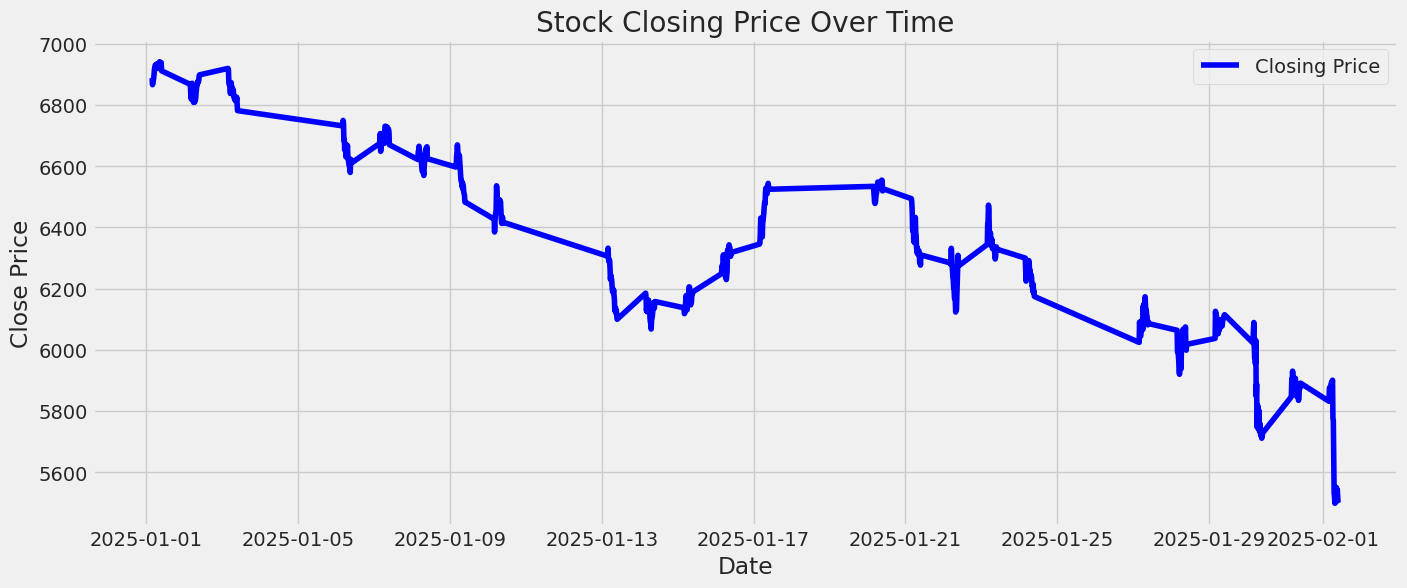

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['close_price'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


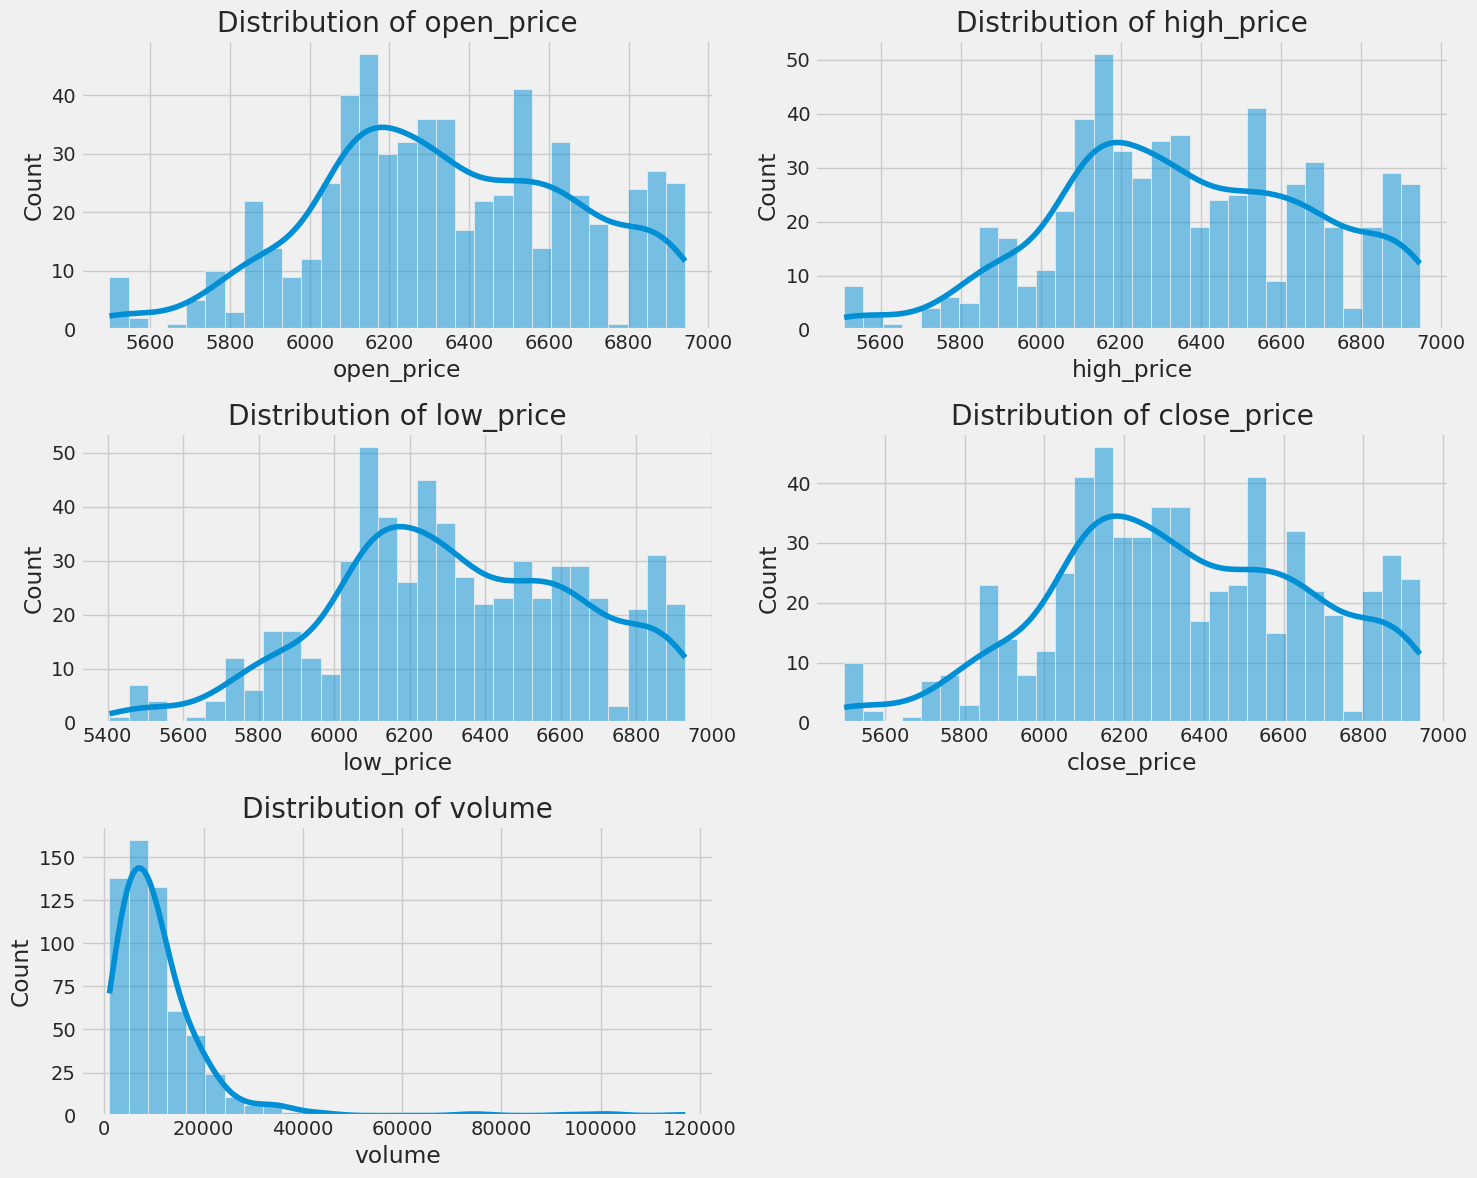

In [13]:
features = ['open_price', 'high_price', 'low_price', 'close_price', 'volume']

plt.figure(figsize=(15, 12))  # Adjust figure size

for i, col in enumerate(features, 1):  # Start index from 1 for subplot
    plt.subplot(3, 2, i)  # Arrange in 3 rows, 2 columns
    sns.histplot(df[col], kde=True, bins=30)  # Use Seaborn's histplot instead of distplot (deprecated)
    plt.title(f"Distribution of {col}")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


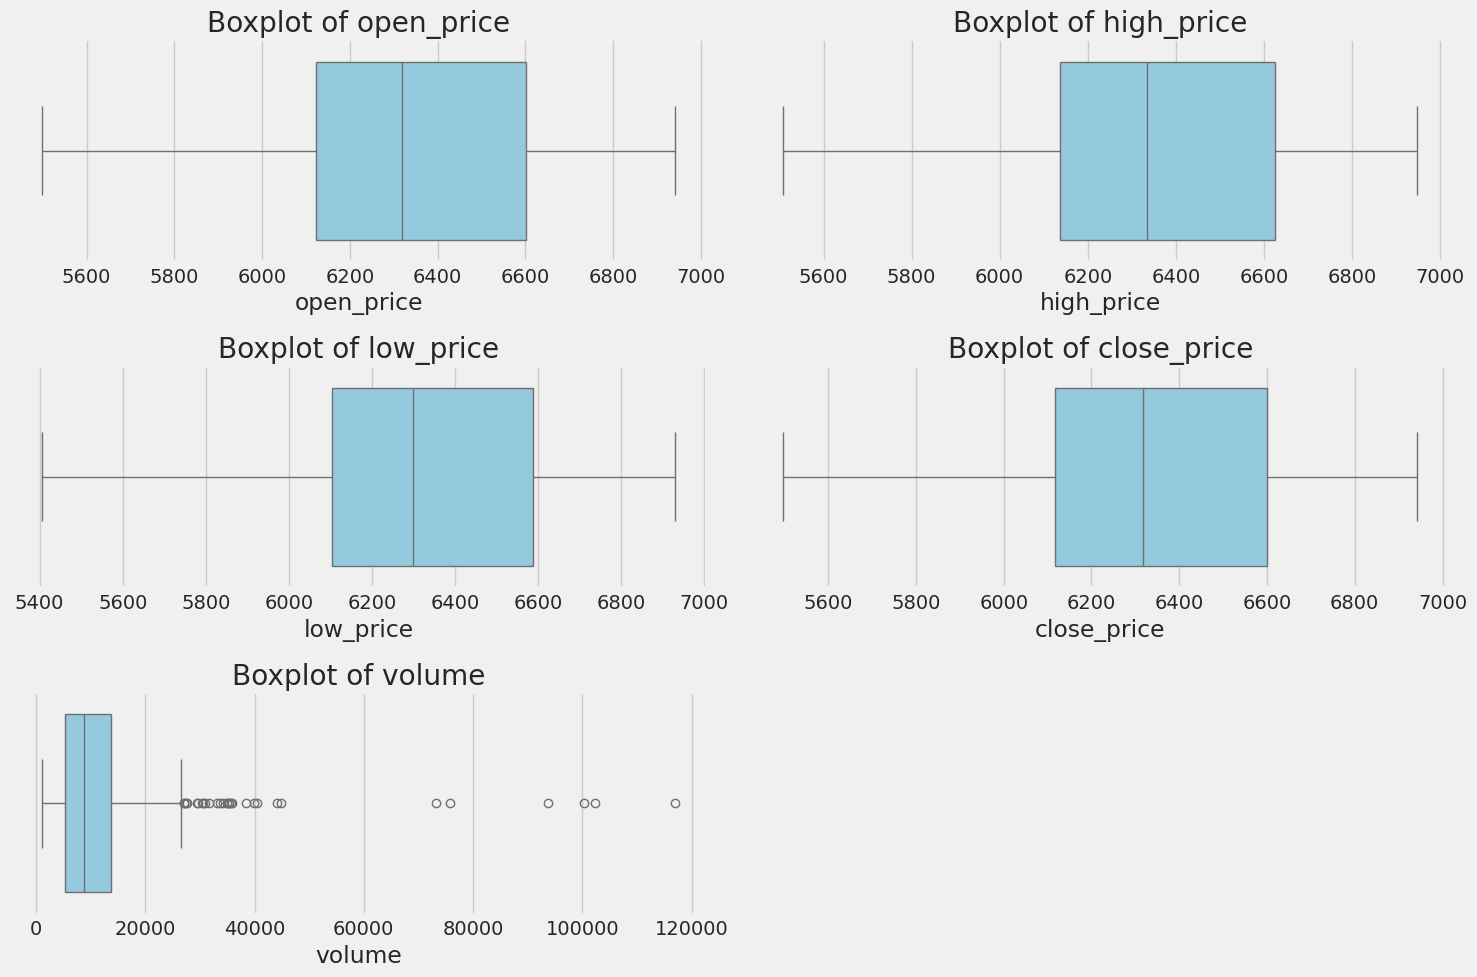

In [14]:
plt.figure(figsize=(15, 10))  # Adjust figure size

for i, col in enumerate(features, 1):  # Start index from 1 for subplot
    plt.subplot(3, 2, i)  # Arrange in 3 rows, 2 columns for better spacing
    sns.boxplot(x=df[col], color='skyblue')  # Added color for better visibility
    plt.title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [15]:
df.head(5)

,open_price,high_price,low_price,close_price,volume
timestamp,,,,,
2025-01-01 03:45:00,6912.00,6929.45,6863.15,6888.00,6708
2025-01-01 04:00:00,6888.00,6893.05,6860.10,6866.60,3387
2025-01-01 04:15:00,6866.60,6880.00,6846.25,6873.30,3667
2025-01-01 04:30:00,6875.80,6898.75,6867.10,6879.85,3122
2025-01-01 04:45:00,6879.85,6898.00,6879.05,6889.00,1223


In [16]:
# Feature Engineering
df['price_change'] = df['close_price'].diff()
df['price_direction'] = np.where(df['price_change'] > 0, 1, 0)  # 1 for up, 0 for down

In [17]:
df['sma_5'] = df['close_price'].rolling(window=5).mean()
df['sma_10'] = df['close_price'].rolling(window=10).mean()
df['ema_5'] = df['close_price'].ewm(span=5, adjust=False).mean()
df['ema_10'] = df['close_price'].ewm(span=10, adjust=False).mean()
df['rsi'] = 100 - (100 / (1 + df['price_change'].rolling(window=14).mean() /
                           df['price_change'].rolling(window=14).std()))

In [18]:
df.dropna(inplace=True)  # Drop NaN values after feature engineering

In [19]:
# Selecting Features
features = ['open_price', 'high_price', 'low_price', 'close_price', 'volume', 'sma_5', 'sma_10', 'ema_5', 'ema_10', 'rsi']
X = df[features]
y = df['price_direction']

In [20]:
# Scaling features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

***XGBoost***

In [22]:
# Hyperparameter tuning for XGBoost
xgb_model = XGBClassifier()
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [23]:
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [24]:
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 61.02%
              precision    recall  f1-score   support

           0       0.67      0.39      0.49        57
           1       0.59      0.82      0.68        61

    accuracy                           0.61       118
   macro avg       0.63      0.60      0.59       118
weighted avg       0.63      0.61      0.59       118



In [25]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.figure(figsize=(6, 4))
    disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)

    plt.grid(False)  # Remove the gray grid lines
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

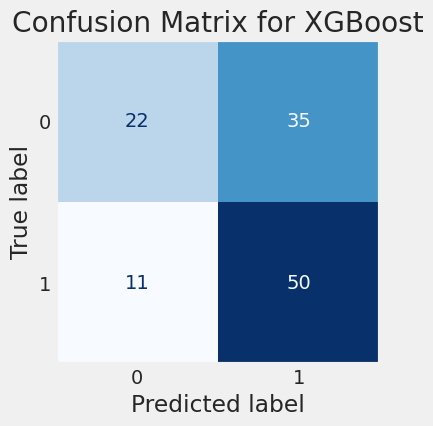

In [26]:
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

******

***Random Forest***

In [27]:
# Hyperparameter tuning for Random Forest
rf_model = RandomForestClassifier()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [28]:
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [29]:
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 62.71%
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        57
           1       0.66      0.57      0.61        61

    accuracy                           0.63       118
   macro avg       0.63      0.63      0.63       118
weighted avg       0.63      0.63      0.63       118



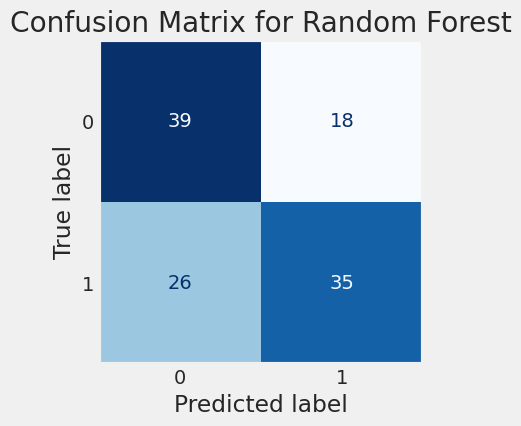

In [30]:
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

***SVM***

In [31]:
# Hyperparameter tuning for SVM
svm_model = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [32]:
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [33]:
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 88.98%
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        57
           1       0.93      0.85      0.89        61

    accuracy                           0.89       118
   macro avg       0.89      0.89      0.89       118
weighted avg       0.89      0.89      0.89       118



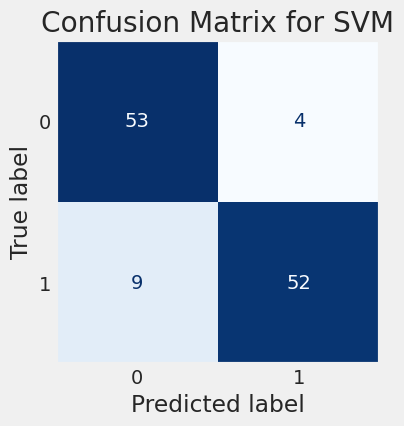

In [34]:
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

***Decision Tree***

In [35]:
# Hyperparameter tuning for Decision Tree
dt_model = DecisionTreeClassifier()
dt_params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [36]:
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [37]:
best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 55.93%
              precision    recall  f1-score   support

           0       0.65      0.19      0.30        57
           1       0.54      0.90      0.68        61

    accuracy                           0.56       118
   macro avg       0.60      0.55      0.49       118
weighted avg       0.59      0.56      0.49       118



***K-Nearest Neighbors (KNN)***

In [38]:
# Hyperparameter tuning for K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [39]:
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [40]:
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 54.24%
              precision    recall  f1-score   support

           0       0.52      0.74      0.61        57
           1       0.59      0.36      0.45        61

    accuracy                           0.54       118
   macro avg       0.56      0.55      0.53       118
weighted avg       0.56      0.54      0.53       118



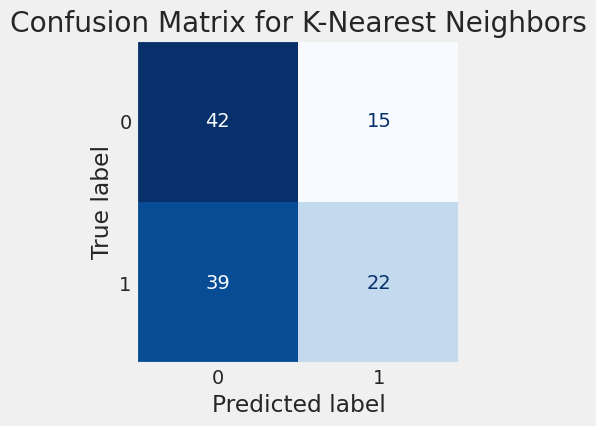

In [41]:
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")

***Logistic Regression***

In [42]:
# Hyperparameter tuning for Logistic Regression
log_model = LogisticRegression()
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

In [43]:
log_grid = GridSearchCV(log_model, log_params, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [44]:
best_log = log_grid.best_estimator_
y_pred_log = best_log.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy_log * 100:.2f}%')
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 75.42%
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        57
           1       0.82      0.67      0.74        61

    accuracy                           0.75       118
   macro avg       0.76      0.76      0.75       118
weighted avg       0.76      0.75      0.75       118



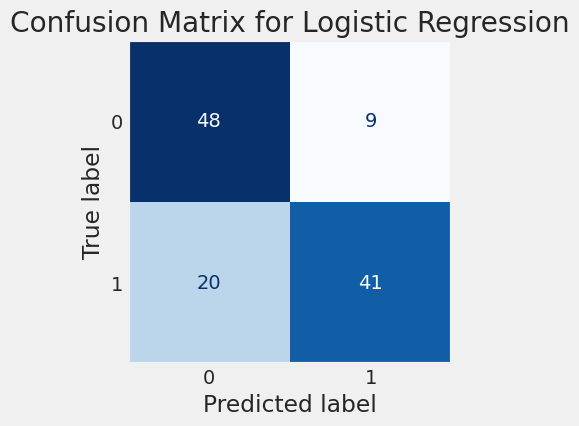

In [45]:
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

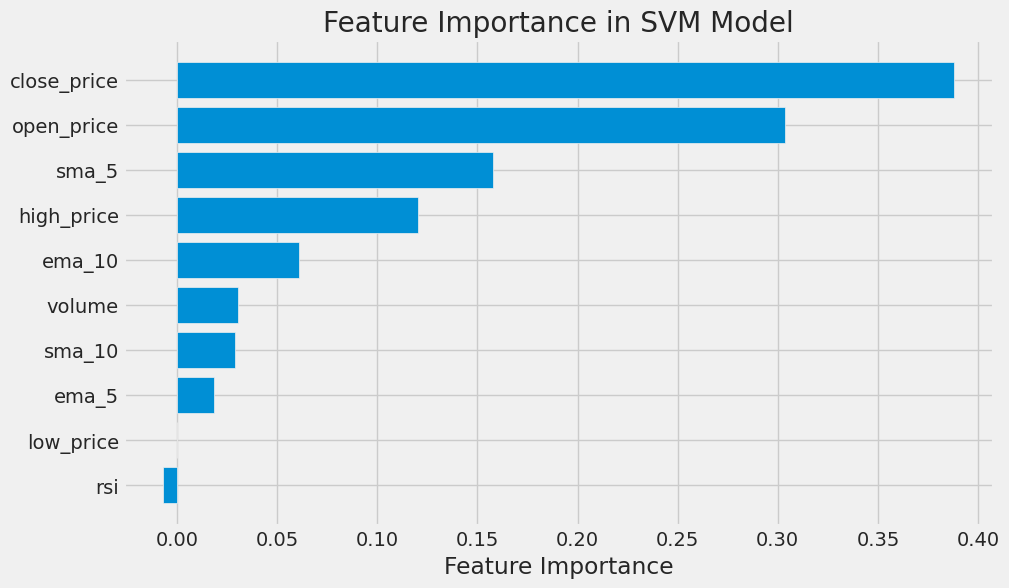

In [46]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_svm, X_test, y_test, scoring='accuracy')
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10,6))
plt.barh(np.array(features)[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in SVM Model")
plt.show()


In [47]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('svm', best_svm),
    ('rf', best_rf),
    ('dt', best_dt),
    ('knn', best_knn),
    ('log', best_log),
    ('xgb', best_xgb)

], voting='hard')

ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Accuracy: {accuracy_ensemble * 100:.2f}%')


Ensemble Accuracy: 75.42%


In [48]:
import joblib

# Save the trained SVM model
joblib.dump(best_svm, 'svm_model.pkl')
print("SVM model saved successfully.")


SVM model saved successfully.
